In [2]:
import numpy as np
import pandas as pd
import os
import shap
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
shap.initjs()
from sklearn.preprocessing import StandardScaler
#mean squared
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn import metrics
data2012 = pd.read_csv('/home/peter/Documents/DSProject/finalData2012.csv')
data2013 = pd.read_csv('/home/peter/Documents/DSProject/finalData2013.csv')
data2014 = pd.read_csv('/home/peter/Documents/DSProject/finalData2014.csv')

data = pd.read_csv('/home/peter/Documents/DSProject/Data00-13.csv')
data14 = pd.read_csv('/home/peter/Documents/DSProject/Data14-14.csv')

In [3]:
data

,State,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,6.3
1,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,8.0,1.145833,4.200,21,6.3
3,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,8.0,0.878947,2.200,23,25.0
4,Arizona,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464407,Wyoming,2013-12-30,3.426087,14.5,22,13,0.041000,0.044,8,37,0.000000,0.0,2,8.0,0.025000,0.100,0,1.0
1464408,Wyoming,2013-12-31,1.004167,1.5,16,1,0.042263,0.045,0,38,0.033333,0.3,23,0.0,0.011875,0.044,21,6.3
1464409,Wyoming,2013-12-31,1.004167,1.5,16,1,0.042263,0.045,0,38,0.033333,0.3,23,0.0,0.016667,0.100,0,1.0
1464410,Wyoming,2013-12-31,1.004167,1.5,16,1,0.042263,0.045,0,38,0.025000,0.1,14,8.0,0.011875,0.044,21,6.3


In [4]:
Uta14 = data['State'] == 'California'
Utah14 = data[Uta14]
######################## Daily Seperation
Utah14 = Utah14.groupby('Date Local').mean().reset_index()
UtahDaily2014 = Utah14

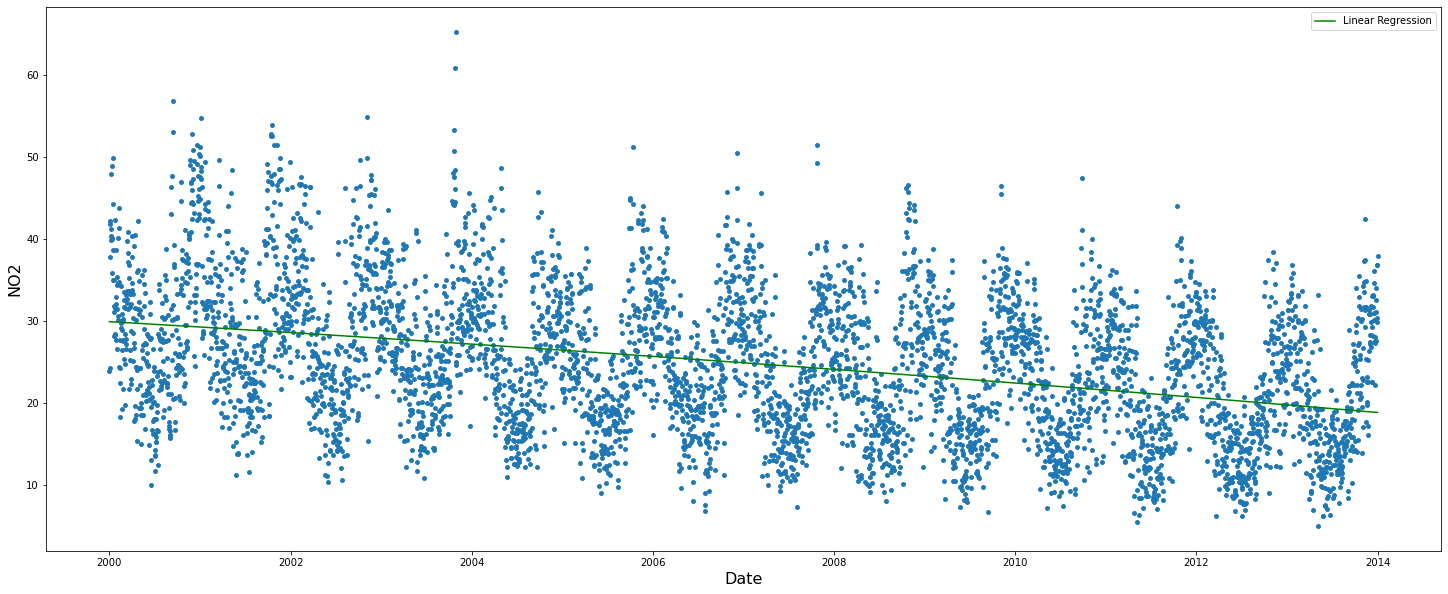

In [5]:
pd.DatetimeIndex(UtahDaily2014['Date Local'])
date = UtahDaily2014['Date Local']
N02 = UtahDaily2014['NO2 AQI']
UtahDaily2014 = pd.DataFrame({'time': date, 'NO2AQI': N02})
UtahDaily2014.time = pd.to_datetime(UtahDaily2014.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(UtahDaily2014.time.values.reshape(-1,1),UtahDaily2014.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(UtahDaily2014.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(UtahDaily2014.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(UtahDaily2014.time.values,UtahDaily2014.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [6]:
UtahDaily2014

,time,NO2AQI
0,2000-01-01,23.904762
1,2000-01-02,24.300000
2,2000-01-03,37.837209
3,2000-01-04,41.818182
4,2000-01-05,42.136364
...,...,...
5109,2013-12-27,36.807692
5110,2013-12-28,29.846154
5111,2013-12-29,30.423077
5112,2013-12-30,36.884615


In [7]:
UtahDaily2014['time'] = pd.to_datetime(UtahDaily2014['time'])
UtahDaily2014['time']=UtahDaily2014['time'].map(dt.datetime.toordinal)

In [8]:
UtahDaily2014

,time,NO2AQI
0,730120,23.904762
1,730121,24.300000
2,730122,37.837209
3,730123,41.818182
4,730124,42.136364
...,...,...
5109,735229,36.807692
5110,735230,29.846154
5111,735231,30.423077
5112,735232,36.884615


In [9]:
polly = PolynomialFeatures(degree=3)

In [10]:
x = UtahDaily2014.iloc[:,0:1]
y = UtahDaily2014.iloc[:,1:2]

In [11]:
x

,time
0,730120
1,730121
2,730122
3,730123
4,730124
...,...
5109,735229
5110,735230
5111,735231
5112,735232


In [12]:
y

,NO2AQI
0,23.904762
1,24.300000
2,37.837209
3,41.818182
4,42.136364
...,...
5109,36.807692
5110,29.846154
5111,30.423077
5112,36.884615


In [13]:
x_poly = polly.fit_transform(x)

In [14]:
x_poly

array([[1.00000000e+00, 7.30120000e+05, 5.33075214e+11, 3.89208876e+17],
       [1.00000000e+00, 7.30121000e+05, 5.33076675e+11, 3.89210475e+17],
       [1.00000000e+00, 7.30122000e+05, 5.33078135e+11, 3.89212074e+17],
       ...,
       [1.00000000e+00, 7.35231000e+05, 5.40564623e+11, 3.97439869e+17],
       [1.00000000e+00, 7.35232000e+05, 5.40566094e+11, 3.97441490e+17],
       [1.00000000e+00, 7.35233000e+05, 5.40567564e+11, 3.97443112e+17]])

In [15]:
polly.fit(x_poly,y)

PolynomialFeatures(degree=3)

In [16]:
lin2 = LinearRegression()

In [17]:
lin2.fit(x_poly,y)

LinearRegression()

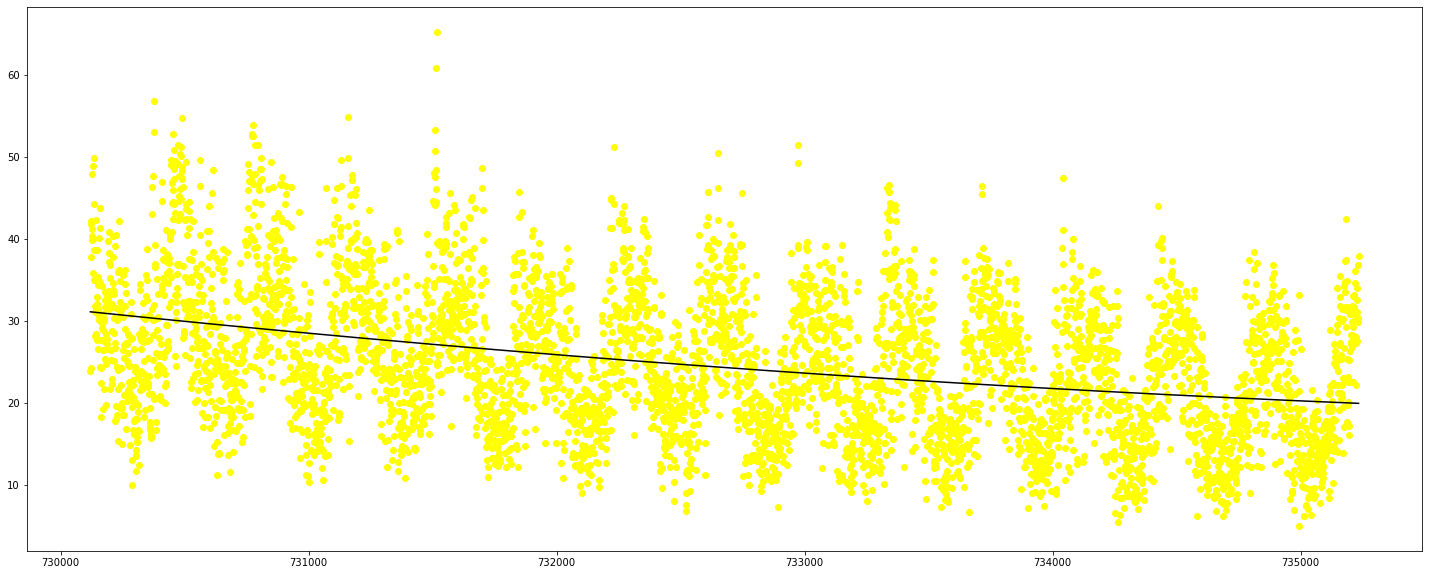

In [18]:
plt.figure(figsize=(25,10))
plt.scatter(x,y,color='yellow')
plt.plot(x,lin2.predict(polly.fit_transform(x)),color='black')
plt.show()

In [19]:
sc_X = StandardScaler()
sc_Y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_Y.fit_transform(y)

In [20]:
from sklearn.svm import SVR

In [21]:
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SVR()

In [22]:
y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))
y_pred = sc_Y.inverse_transform(y_pred)

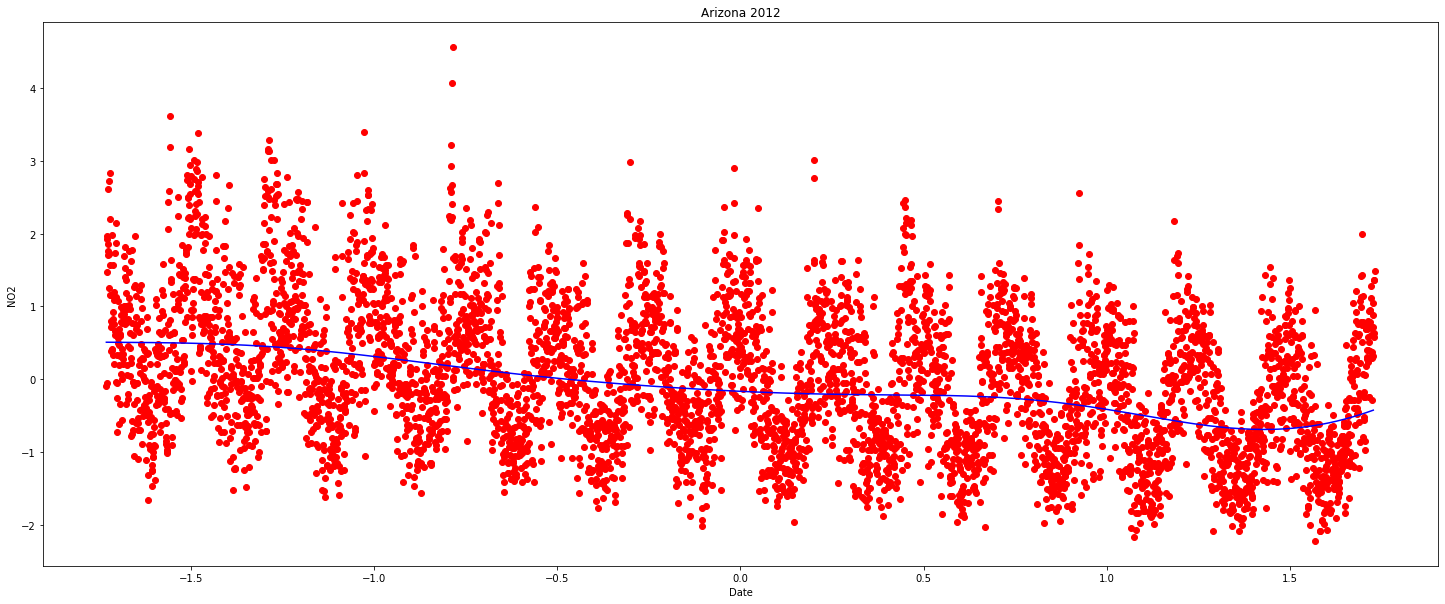

In [23]:
X_grid = np.arange(min(x),max(x),0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.figure(figsize=(25,10))
plt.scatter(x,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title("Arizona 2012")
plt.xlabel("Date")
plt.ylabel("NO2")

plt.show()

In [24]:
data14

,State,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Alabama,2014-01-01,16.512500,47.1,0,44,0.013250,0.020,10,19,0.363636,2.9,0,3.00,0.204545,0.500,2,4.24
1,Alabama,2014-01-01,16.512500,47.1,0,44,0.013250,0.020,10,19,0.363636,2.9,0,3.00,0.200000,0.500,7,6.00
2,Alabama,2014-01-01,16.512500,47.1,0,44,0.013250,0.020,10,19,0.242857,0.9,5,3.04,0.204545,0.500,2,4.24
3,Alabama,2014-01-01,16.512500,47.1,0,44,0.013250,0.020,10,19,0.242857,0.9,5,3.04,0.200000,0.500,7,6.00
4,Alabama,2014-01-02,3.662500,7.9,6,7,0.018458,0.028,19,26,-0.009091,0.0,0,0.00,0.158824,0.300,16,4.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131584,Wyoming,2014-12-30,7.579167,29.5,20,27,0.025875,0.032,9,30,0.037500,0.2,14,3.04,0.166667,0.200,8,2.00
131585,Wyoming,2014-12-31,4.420833,12.6,0,11,0.041263,0.045,8,42,0.000000,0.0,0,0.00,0.105500,0.146,2,4.24
131586,Wyoming,2014-12-31,4.420833,12.6,0,11,0.041263,0.045,8,42,0.000000,0.0,0,0.00,0.116667,0.200,0,2.00
131587,Wyoming,2014-12-31,4.420833,12.6,0,11,0.041263,0.045,8,42,0.000000,0.0,2,3.04,0.105500,0.146,2,4.24


In [25]:
Ill13 = data14['State'] == 'Utah'
Illinois13 = data14[Ill13]
######################## Monthly Seperation
Illinois13['Date Local'] =  pd.to_datetime(Illinois13['Date Local'])
Illinois13.set_index('Date Local', inplace=True)
Illinois13.index = pd.to_datetime(Illinois13.index)
IllinoisMonthly2013=Illinois13.resample('1M').mean().reset_index()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
IllinoisMonthly2013

,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2014-01-31,34.366736,45.454545,13.090909,42.818182,0.007989,0.018636,10.090909,17.090909,1.361480,2.672727,12.409091,3.338182,0.792355,1.463636,9.409091,8.574545
1,2014-02-28,17.118296,31.607143,12.392857,29.821429,0.016364,0.030571,11.142857,28.285714,0.407620,0.801786,11.982143,1.805714,0.413012,0.826429,9.107143,5.798571
2,2014-03-31,14.564968,31.806452,11.838710,30.032258,0.026940,0.042452,10.451613,39.258065,0.433418,0.959677,9.258065,1.923226,0.310498,0.625484,8.935484,4.926452
3,2014-04-30,11.851383,30.133333,10.466667,28.400000,0.031426,0.046700,9.733333,43.400000,0.451425,0.985000,11.650000,1.936667,0.277971,0.525667,6.366667,4.386667
4,2014-05-31,8.438184,20.741935,10.096774,19.580645,0.037102,0.050548,10.516129,47.677419,0.275676,0.709677,11.435484,1.713548,0.220141,0.347419,7.096774,3.620000
5,2014-06-30,7.529481,17.285714,7.500000,16.285714,0.039976,0.056214,10.000000,61.071429,0.513922,2.271429,11.214286,3.091429,0.221995,0.440000,5.107143,3.870000
6,2014-07-31,7.606990,19.161290,11.612903,18.000000,0.041137,0.057484,10.419355,65.000000,0.417293,1.022581,13.596774,1.971613,0.202362,0.313548,7.387097,3.474839
7,2014-08-31,8.635285,21.709677,10.322581,20.451613,0.039160,0.053871,9.838710,58.741935,0.438410,1.093548,12.500000,2.020000,0.212535,0.340645,6.887097,3.571613
8,2014-09-30,10.909314,25.000000,10.521739,23.478261,0.028811,0.042870,10.478261,40.217391,0.401769,0.928261,10.608696,1.911304,0.239059,0.408913,7.456522,3.859130
9,2014-10-31,18.053763,34.000000,13.451613,32.064516,0.019391,0.036452,9.709677,33.612903,0.541935,1.098387,11.064516,2.003871,0.362534,0.757903,7.048387,5.297419


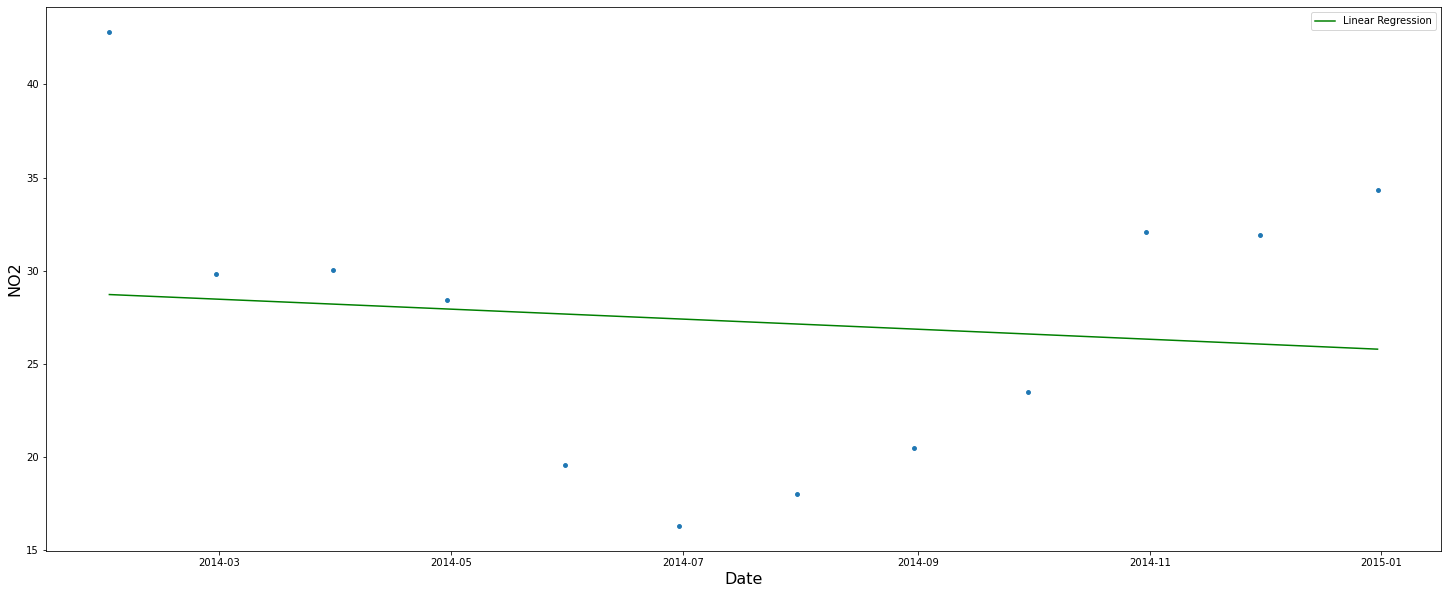

In [27]:
pd.DatetimeIndex(IllinoisMonthly2013['Date Local'])
date = IllinoisMonthly2013['Date Local']
N02 = IllinoisMonthly2013['NO2 AQI']
IllinoisMonthly2013 = pd.DataFrame({'time': date, 'NO2AQI': N02})
IllinoisMonthly2013.time = pd.to_datetime(IllinoisMonthly2013.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(IllinoisMonthly2013.time.values.reshape(-1,1),IllinoisMonthly2013.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(IllinoisMonthly2013.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(IllinoisMonthly2013.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(IllinoisMonthly2013.time.values,IllinoisMonthly2013.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [28]:
IllinoisMonthly2013


,time,NO2AQI
0,2014-01-31,42.818182
1,2014-02-28,29.821429
2,2014-03-31,30.032258
3,2014-04-30,28.400000
4,2014-05-31,19.580645
5,2014-06-30,16.285714
6,2014-07-31,18.000000
7,2014-08-31,20.451613
8,2014-09-30,23.478261
9,2014-10-31,32.064516


In [29]:
IllinoisMonthly2013['time'] = pd.to_datetime(IllinoisMonthly2013['time'])
IllinoisMonthly2013['time']=IllinoisMonthly2013['time'].map(dt.datetime.toordinal)

In [30]:
polly = PolynomialFeatures(degree=3)

In [31]:
x = IllinoisMonthly2013.iloc[:,0:1]
y = IllinoisMonthly2013.iloc[:,1:2]

In [32]:
x_poly = polly.fit_transform(x)

In [33]:
polly.fit(x_poly,y)

PolynomialFeatures(degree=3)

In [34]:
lin2 = LinearRegression()

In [35]:
lin2.fit(x_poly,y)

LinearRegression()

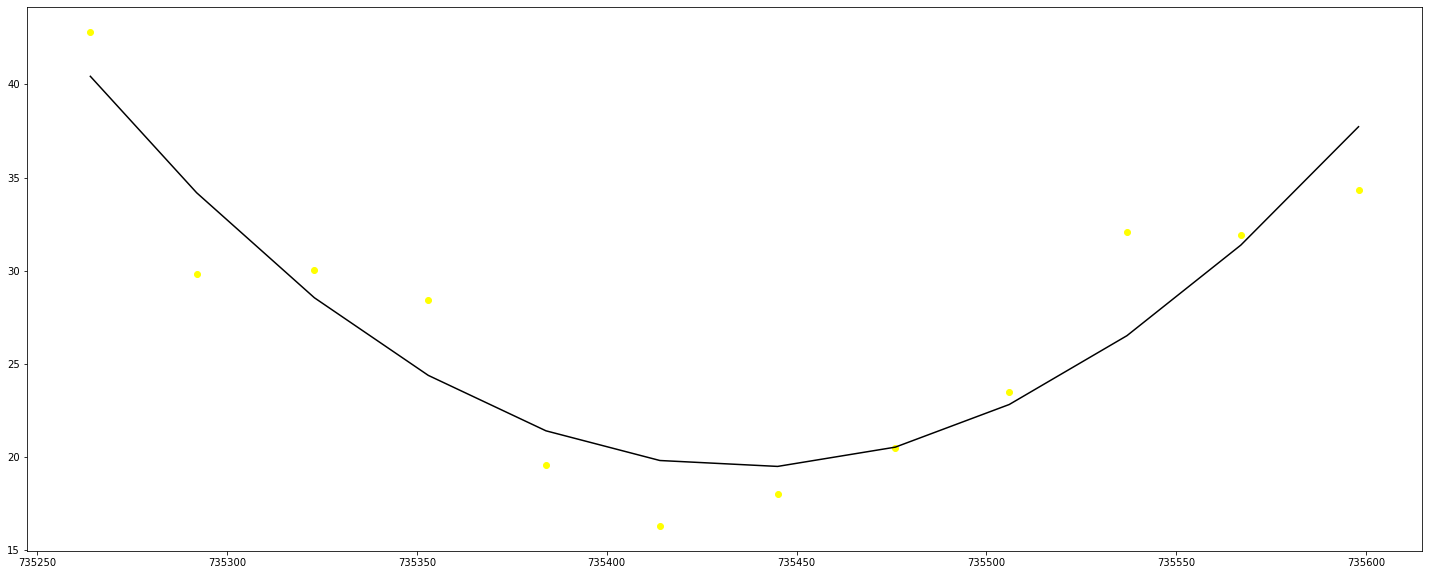

In [36]:
plt.figure(figsize=(25,10))
plt.scatter(x,y,color='yellow')
plt.plot(x,lin2.predict(polly.fit_transform(x)),color='black')
plt.show()

In [37]:
data = pd.concat([data2012, data2013], axis=0)

In [38]:
Uta14 = data['State'] == 'Utah'
Utah14 = data[Uta14]
######################## Daily Seperation
Utah14 = Utah14.groupby('Date Local').mean().reset_index()
UtahDaily2014 = Utah14

In [39]:
UtahDaily2014

,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2012-01-01,31.458333,41.0,19.0,39.0,0.007417,0.022,9.0,19.0,1.289583,3.35,13.5,3.55,0.720460,1.260,13.5,7.65
1,2012-01-02,35.826087,40.0,8.0,38.0,0.003542,0.011,9.0,9.0,1.372981,3.50,11.5,4.55,0.852735,1.415,12.0,9.15
2,2012-01-03,35.300000,48.0,8.0,45.0,0.002250,0.007,8.0,6.0,1.721666,4.00,10.5,4.55,1.164603,2.385,10.5,10.65
3,2012-01-04,42.217391,54.0,9.0,51.0,0.001375,0.005,9.0,4.0,2.037889,4.80,11.0,5.05,1.613116,7.530,21.0,17.15
4,2012-01-05,43.375000,58.0,11.0,55.0,0.001667,0.005,8.0,4.0,1.562500,2.70,11.0,3.55,1.278334,3.125,4.0,17.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2013-12-27,50.666667,66.0,11.0,64.0,0.004375,0.012,10.0,11.0,1.472222,3.60,11.0,4.55,1.109849,1.960,8.0,10.65
695,2013-12-28,33.375000,44.0,0.0,42.0,0.005167,0.015,9.0,14.0,1.116667,3.65,13.0,4.55,0.711932,1.125,0.5,7.15
696,2013-12-29,33.958333,55.0,18.0,52.0,0.008000,0.023,9.0,21.0,0.755520,1.85,16.5,3.05,0.725833,1.090,21.0,7.65
697,2013-12-30,38.791667,46.0,16.0,43.0,0.003875,0.011,8.0,10.0,1.323333,4.20,14.0,5.05,1.070379,1.855,7.5,9.65


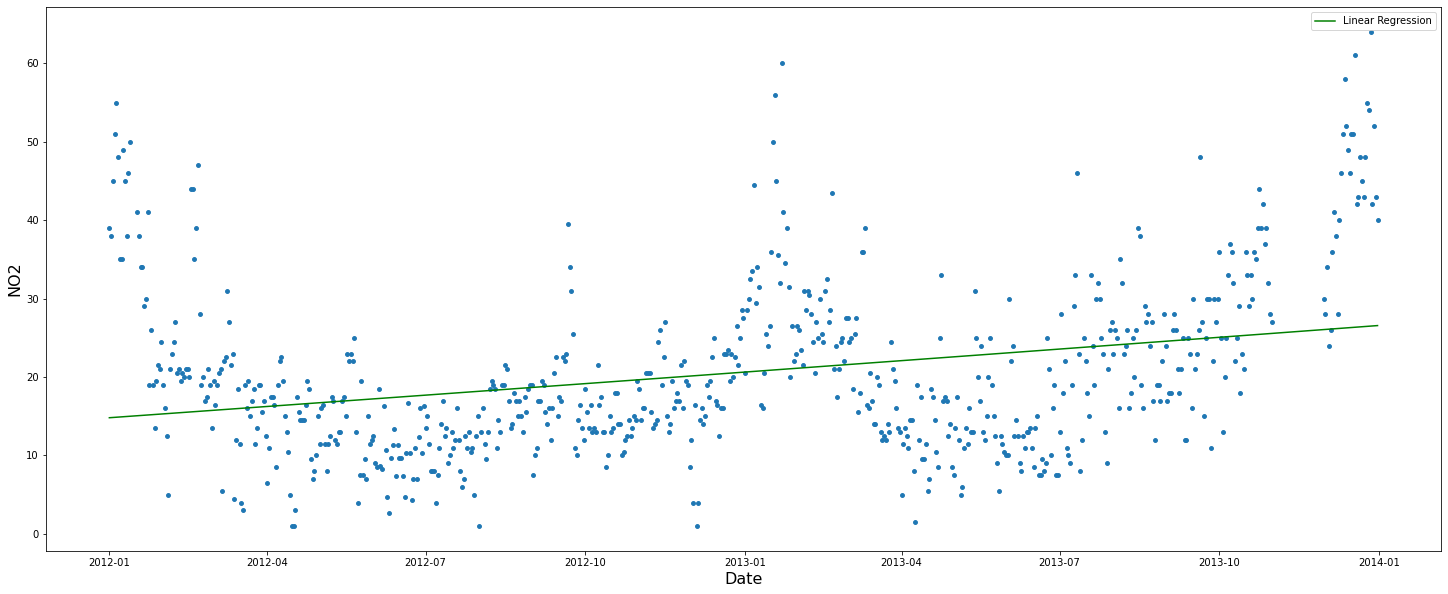

In [40]:
pd.DatetimeIndex(UtahDaily2014['Date Local'])
date = UtahDaily2014['Date Local']
N02 = UtahDaily2014['NO2 AQI']
UtahDaily2014 = pd.DataFrame({'time': date, 'NO2AQI': N02})
UtahDaily2014.time = pd.to_datetime(UtahDaily2014.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(UtahDaily2014.time.values.reshape(-1,1),UtahDaily2014.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(UtahDaily2014.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(UtahDaily2014.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(UtahDaily2014.time.values,UtahDaily2014.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [41]:
UtahDaily2014

,time,NO2AQI
0,2012-01-01,39.0
1,2012-01-02,38.0
2,2012-01-03,45.0
3,2012-01-04,51.0
4,2012-01-05,55.0
...,...,...
694,2013-12-27,64.0
695,2013-12-28,42.0
696,2013-12-29,52.0
697,2013-12-30,43.0


In [42]:
UtahDaily2014['time'] = pd.to_datetime(UtahDaily2014['time'])
UtahDaily2014['time']=UtahDaily2014['time'].map(dt.datetime.toordinal)

In [43]:
polly = PolynomialFeatures(degree=10)

In [44]:
x = UtahDaily2014.iloc[:,0:1]
y = UtahDaily2014.iloc[:,1:2]

In [45]:
x_poly = polly.fit_transform(x)

In [46]:
polly.fit(x_poly,y)

PolynomialFeatures(degree=10)

In [47]:
lin2 = LinearRegression()

In [48]:
lin2.fit(x_poly,y)

LinearRegression()

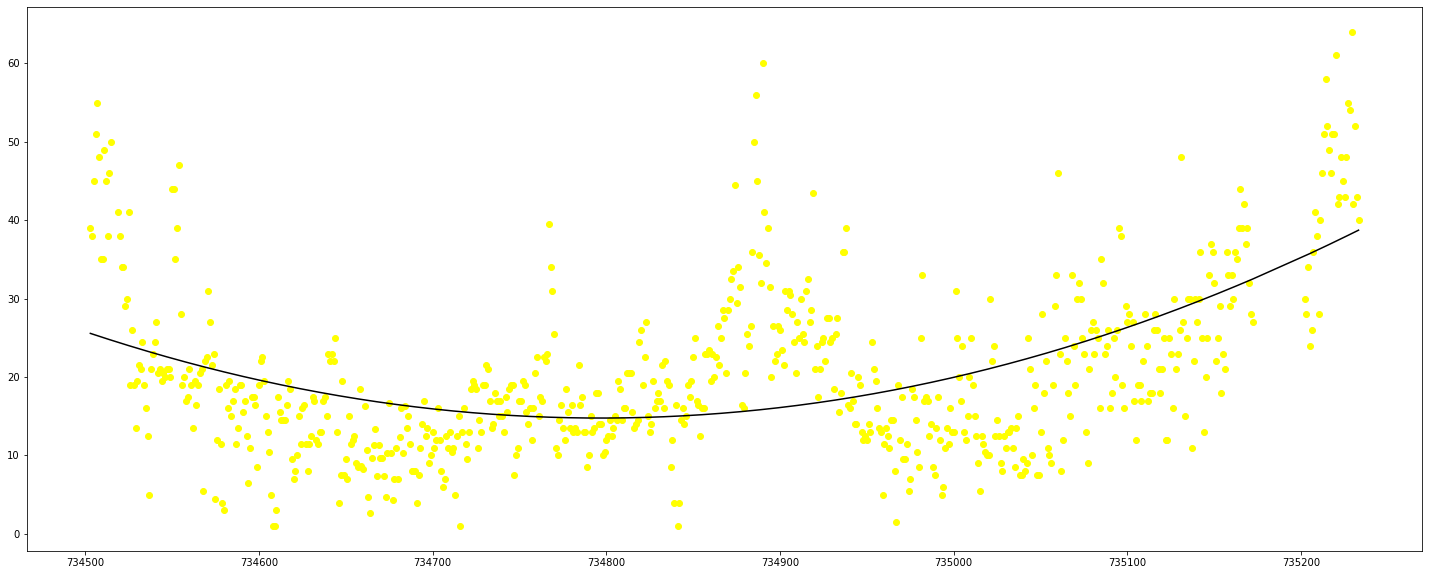

In [49]:
plt.figure(figsize=(25,10))
plt.scatter(x,y,color='yellow')
plt.plot(x,lin2.predict(polly.fit_transform(x)),color='black')
plt.show()

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train_poly = polly.fit_transform(x)


In [51]:
x_predict = np.linspace(0,10,100)

In [52]:
model = LinearRegression()